<a href="https://colab.research.google.com/github/sudharb/aws-test/blob/master/minKnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.stats import multivariate_normal as mvn
import seaborn as sns

%matplotlib inline

In [19]:
data =pd.read_csv("/content/MNIST_train (1).csv")
test_data=pd.read_csv("/content/MNIST_test (2).csv")

In [4]:
data.head(5)

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,5,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2,4,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,3,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,4,9,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
lab = data['labels']
y_test=test_data['labels']

In [21]:
d1=data.drop("Unnamed: 0",axis=1)
d1_test=test_data.drop("Unnamed: 0",axis=1)

In [22]:

d2=d1.drop(["labels","index"],axis=1)
d2_test=d1_test.drop(["labels","index"],axis=1)

In [8]:
A=d2.to_numpy()
A

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., nan, nan, nan]])

In [28]:
B=d2_test.to_numpy()
B

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [9]:
y=lab
X=A

In [10]:
k=set(y)

In [11]:
def show_me(X):
    X
    plt.imshow(X.reshape(28,28))
    
def show_me_allmean(X,y,k):
    show_me(sum(X[y==k,:]/len(X[y==k,:])))

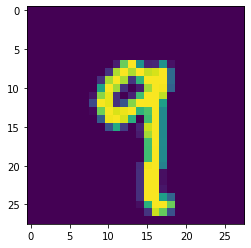

In [12]:
show_me(X[176])

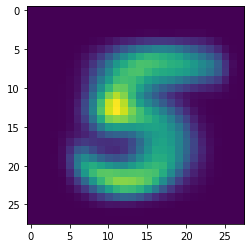

In [13]:
show_me_allmean(X,y,5)

In [14]:
class KNNClassifier():
    def fit(self,X,y):
        self.X=X
        self.y=y
        
    def predict(self,X,K):
        epsilon=1e-3
        N=len(X)
        y_hat=np.zeros(N)
        
        for i in range(N):
            dist2=np.sum((self.X-X[i])**2,axis=1)
            idxt = np.argsort(dist2)[:K]
            gamma_k=1/(np.sqrt(dist2[idxt]+epsilon))
            y_hat[i]=np.bincount(self.y[idxt], weights=gamma_k).argmax()
            
        return y_hat

In [15]:
knn =  KNNClassifier()

In [16]:
knn.fit(X,y)

In [29]:
y_hat=knn.predict(B,5)

In [30]:
def accuracy(y,y_hat):
    return np.mean(y==y_hat)

In [31]:
accuracy(y_test,y_hat)

0.9454

Text(0.5, 42.0, 'Predicted label')

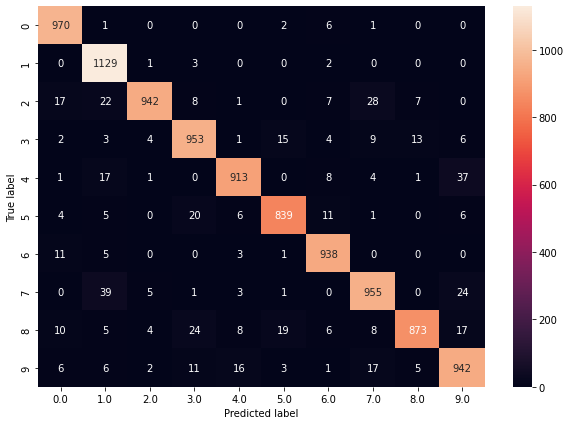

In [32]:
plt.figure(figsize=(10,7))
y_actu = pd.Series(y_test, name='Actual')
y_pred = pd.Series(y_hat, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')